<a href="https://colab.research.google.com/github/habilg/text-basics/blob/master/01A_Text_preprocessing_high_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

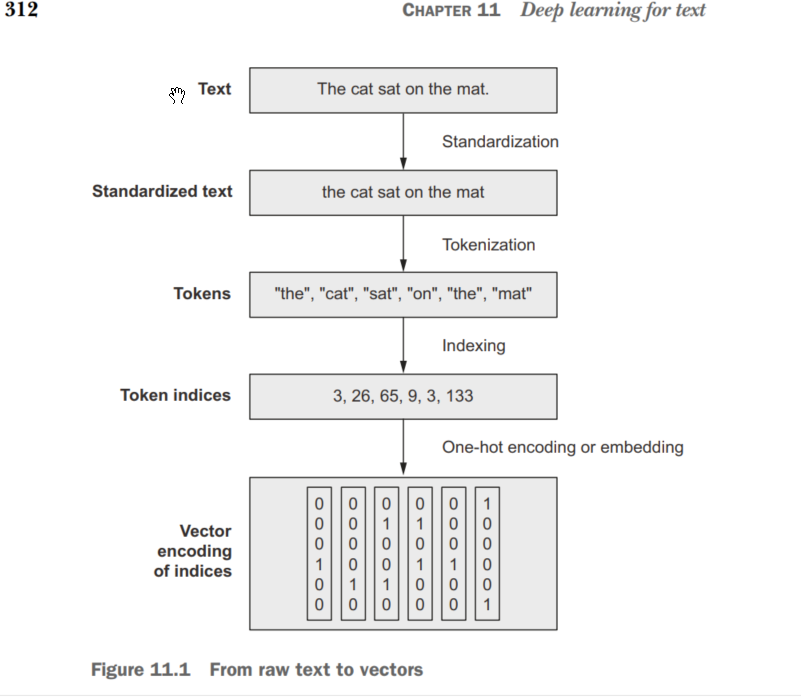

In [1]:
from tensorflow.keras.layers import TextVectorization

By default, the TextVectorization layer will use the setting `“convert to lowercase` and `remove punctuation”` for text standardization, and `“split on whitespace”` for tokenization

In [3]:
text_vectorization = TextVectorization(output_mode="int")

In [4]:
dataset = [
  "I write, erase, rewrite",
  "Erase again, and then",
  "A poppy blooms.",
]

In [6]:
# To index the vocabulary of a text corpus just call the adapt() method of the layer 
# with a Dataset object that yields strings, or just with a list of Python strings:

text_vectorization.adapt(dataset)

In [13]:
# retrieve the computed vocabulary via get_vocabulary()
vocabulary=text_vectorization.get_vocabulary()
vocabulary

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

In [8]:
test_sentence = "I write, rewrite, and still rewrite again"

In [11]:
encoded_sentence = text_vectorization(test_sentence)
encoded_sentence.numpy()

array([ 7,  3,  5,  9,  1,  5, 10])

In [18]:
#maping numbers to words
inverse_vocab = dict(enumerate(vocabulary))
inverse_vocab

{0: '',
 1: '[UNK]',
 2: 'erase',
 3: 'write',
 4: 'then',
 5: 'rewrite',
 6: 'poppy',
 7: 'i',
 8: 'blooms',
 9: 'and',
 10: 'again',
 11: 'a'}

In [19]:
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
decoded_sentence

'i write rewrite and [UNK] rewrite again'

# Costomizing TextVectorization Layer

By default, the TextVectorization layer will use the setting “convert to lowercase and remove punctuation” for text standardization, and “split on whitespace” for tokenization.   
But importantly, you can provide custom functions for standardization and tokenization, which means the layer is flexible enough to handle any use case. Note that such custom functions should operate on `tf.string tensors`, not regular Python strings! For instance, the default layer behavior is equivalent to the following:

In [ ]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
  
  #convert strings to lowercase
  lowercase_string = tf.strings.lower(string_tensor)

  #Replace punctuation characters with the empty string.
  return tf.strings.regex_replace(lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
  return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
    )